# Introduction

This notebook provides a second example based on the [May 10, 2018 talk by Ed Rogers](https://github.com/adamrossnelson/pandas_presentation/blob/master/pandas_talk.ipynb). Ed's example(s) used [bike path data from Montreal Canaada](https://raw.githubusercontent.com/jvns/pandas-cookbook/v0.1/data/bikes.csv). 

This notebook follows uses [automobile data published by Stata Corp](https://www.stata-press.com/data/r9/u.html) (`auto.dta`).

## Diving In

**1978 Automobile Data**

This dataset is a classic training and testing data set familiar to Stata users. This data is cross-sectional. It consists of 74 observations:

```
              storage   display
variable name   type    format    variable label
-------------------------------------------------------------
make            str18   %-18s     Make and Model
price           int     %8.0gc    Price
mpg             int     %8.0g     Mileage (mpg)
rep78           int     %8.0g     Repair Record 1978
headroom        float   %6.1f     Headroom (in.)
trunk           int     %8.0g     Trunk space (cu. ft.)
weight          int     %8.0gc    Weight (lbs.)
length          int     %8.0g     Length (in.)
turn            int     %8.0g     Turn Circle (ft.)
displacement    int     %8.0g     Displacement (cu. in.)
gear_ratio      float   %6.2f     Gear Ratio
foreign         byte    %8.0g     Car type
```

This data source has been used to create a [pandas-Stata/Stata-pandas crosswalk](https://github.com/adamrossnelson/StataQuickReference/blob/master/spcrosswlk.md).

## Setup / Get Data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
%matplotlib inline

In [2]:
# Read data from online
auto_df = pd.read_stata('http://www.stata-press.com/data/r15/auto2.dta', index_col='make')
# Display first few observations
auto_df.head()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
make,,,,,,,,,,,
AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic
AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic
AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic
Buick Electra,7827,15,Good,4.0,20,4080,222,43,350,2.41,Domestic


In [3]:
# Quickly explore statistics
auto_df.describe()

,price,mpg,headroom,trunk,weight,length,turn,displacement,gear_ratio
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,6165.256757,21.297297,2.993243,13.756757,3019.459459,187.932432,39.648649,197.297297,3.014865
std,2949.495885,5.785503,0.845995,4.277404,777.193567,22.266340,4.399354,91.837219,0.456287
min,3291.000000,12.000000,1.500000,5.000000,1760.000000,142.000000,31.000000,79.000000,2.190000
25%,4220.250000,18.000000,2.500000,10.250000,2250.000000,170.000000,36.000000,119.000000,2.730000
50%,5006.500000,20.000000,3.000000,14.000000,3190.000000,192.500000,40.000000,196.000000,2.955000
75%,6332.250000,24.750000,3.500000,16.750000,3600.000000,203.750000,43.000000,245.250000,3.352500
max,15906.000000,41.000000,5.000000,23.000000,4840.000000,233.000000,51.000000,425.000000,3.890000


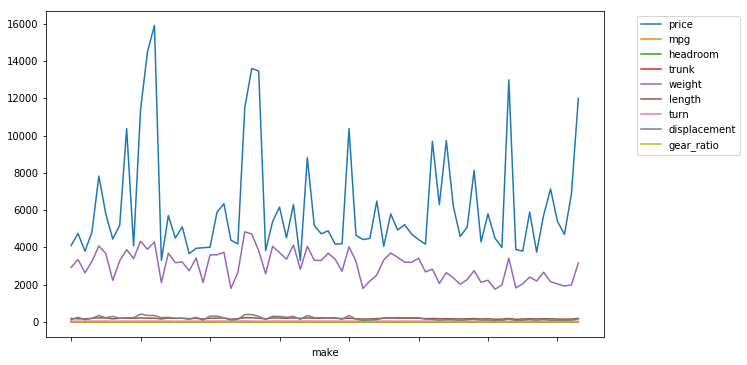

In [4]:
# Basic plot.
auto_df.plot(figsize=(10,6)).legend(bbox_to_anchor=(1.05, 1), loc=2);

## Compute new columns

In [5]:
auto_df['expensive'] = auto_df['price'] > auto_df['price'].median()
auto_df['mpg_weight'] = auto_df['mpg'] / auto_df['weight']
auto_df.head()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,expensive,mpg_weight
make,,,,,,,,,,,,,
AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic,False,0.007509
AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic,False,0.005075
AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,False,0.008333
Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic,False,0.006154
Buick Electra,7827,15,Good,4.0,20,4080,222,43,350,2.41,Domestic,True,0.003676


## Advanced column computation

In [6]:
# Define a funtion to apply on each column.
def normalize(a):
    try:
        # If computation is possible (a needs to be number and a.std() needs to be nonzero)
        return(a - a.mean())/a.std()
    except:
        # If not computable return null (np.nan)
        return(np.nan)

auto_df.apply(normalize).head()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,expensive,mpg_weight
make,,,,,,,,,,,,,
AMC Concord,-0.700546,0.121459,NaN,-0.583034,-0.644493,-0.115106,-0.086787,0.079864,-0.830788,1.238551,NaN,-0.99322,-0.119635
AMC Pacer,-0.480169,-0.742770,NaN,0.007987,-0.644493,0.425300,-0.670628,0.079864,0.660981,-1.062631,NaN,-0.99322,-0.695247
AMC Spirit,-0.802258,0.121459,NaN,0.007987,-0.410706,-0.488243,-0.895182,-1.056666,-0.830788,0.142750,NaN,-0.99322,0.075428
Buick Century,-0.457453,-0.224232,NaN,1.781048,0.524440,0.296632,0.362321,0.079864,-0.014126,-0.185990,NaN,-0.99322,-0.440014
Buick Electra,0.563399,-1.088461,NaN,1.190027,1.459587,1.364577,1.530003,0.761783,1.662754,-1.325623,NaN,0.99322,-1.025907


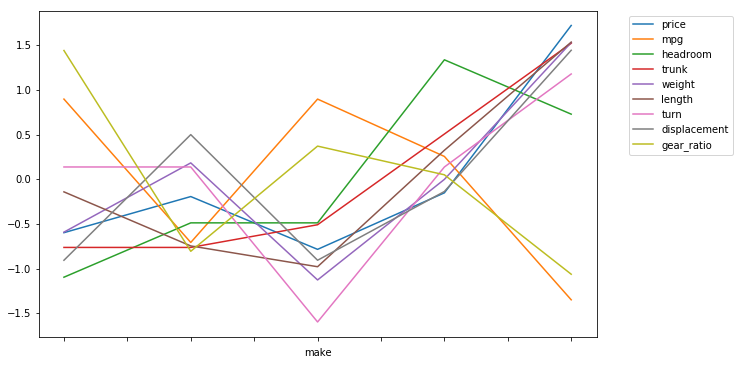

In [7]:
auto_df.head()[[
    'price','mpg','headroom','trunk','weight','length','turn','displacement','gear_ratio'
        ]].apply(normalize).plot(figsize=(10,6)).legend(bbox_to_anchor=(1.05, 1), loc=2);

In [8]:
auto_df.index

Index(['AMC Concord', 'AMC Pacer', 'AMC Spirit', 'Buick Century',
       'Buick Electra', 'Buick LeSabre', 'Buick Opel', 'Buick Regal',
       'Buick Riviera', 'Buick Skylark', 'Cad. Deville', 'Cad. Eldorado',
       'Cad. Seville', 'Chev. Chevette', 'Chev. Impala', 'Chev. Malibu',
       'Chev. Monte Carlo', 'Chev. Monza', 'Chev. Nova', 'Dodge Colt',
       'Dodge Diplomat', 'Dodge Magnum', 'Dodge St. Regis', 'Ford Fiesta',
       'Ford Mustang', 'Linc. Continental', 'Linc. Mark V', 'Linc. Versailles',
       'Merc. Bobcat', 'Merc. Cougar', 'Merc. Marquis', 'Merc. Monarch',
       'Merc. XR-7', 'Merc. Zephyr', 'Olds 98', 'Olds Cutl Supr',
       'Olds Cutlass', 'Olds Delta 88', 'Olds Omega', 'Olds Starfire',
       'Olds Toronado', 'Plym. Arrow', 'Plym. Champ', 'Plym. Horizon',
       'Plym. Sapporo', 'Plym. Volare', 'Pont. Catalina', 'Pont. Firebird',
       'Pont. Grand Prix', 'Pont. Le Mans', 'Pont. Phoenix', 'Pont. Sunbird',
       'Audi 5000', 'Audi Fox', 'BMW 320i', 'Datsun 200'

## Split: aka "GroupBy"

### Group by manufacturing origin

In [9]:
auto_df_grpby_foreign = auto_df.groupby('foreign', sort=False)
auto_df_grpby_foreign.get_group('Domestic').head()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,expensive,mpg_weight
make,,,,,,,,,,,,,
AMC Concord,4099,22,Average,2.5,11,2930,186,40,121,3.58,Domestic,False,0.007509
AMC Pacer,4749,17,Average,3.0,11,3350,173,40,258,2.53,Domestic,False,0.005075
AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,False,0.008333
Buick Century,4816,20,Average,4.5,16,3250,196,40,196,2.93,Domestic,False,0.006154
Buick Electra,7827,15,Good,4.0,20,4080,222,43,350,2.41,Domestic,True,0.003676


In [10]:
auto_df_grpby_foreign.get_group('Foreign').head()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,expensive,mpg_weight
make,,,,,,,,,,,,,
Audi 5000,9690,17,Excellent,3.0,15,2830,189,37,131,3.20,Foreign,True,0.006007
Audi Fox,6295,23,Average,2.5,11,2070,174,36,97,3.70,Foreign,True,0.011111
BMW 320i,9735,25,Good,2.5,12,2650,177,34,121,3.64,Foreign,True,0.009434
Datsun 200,6229,23,Good,1.5,6,2370,170,35,119,3.89,Foreign,True,0.009705
Datsun 210,4589,35,Excellent,2.0,8,2020,165,32,85,3.70,Foreign,False,0.017327


In [11]:
auto_df_grpby_foreign['price'].describe()

,count,mean,std,min,25%,50%,75%,max
foreign,,,,,,,,
Domestic,52.0,6072.423077,3097.104279,3291.0,4185.5,4782.5,6199.5,15906.0
Foreign,22.0,6384.681818,2621.915083,3748.0,4521.5,5759.0,7067.5,12990.0


### Group by repair record

In [12]:
auto_df_grpby_rep78 = auto_df.groupby('rep78', sort=False)
auto_df_grpby_rep78['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rep78,,,,,,,,
Poor,2.0,4564.500000,522.551911,4195.0,4379.75,4564.5,4749.25,4934.0
Fair,8.0,5967.625000,3579.356763,3667.0,4047.50,4638.0,6000.00,14500.0
Average,30.0,6429.233333,3525.139838,3291.0,4214.25,4741.0,6262.50,15906.0
Good,18.0,6071.500000,1709.608288,3829.0,4745.25,5751.5,7067.50,9735.0
Excellent,11.0,5913.000000,2615.762757,3748.0,4204.50,5397.0,5849.00,11995.0


### Advanced grouping

In [13]:
# First by manufacturing origin and then by repair record.
auto_df_grpby_rep78_foreign = auto_df.groupby(['foreign','rep78'], sort=False)
auto_df_grpby_rep78_foreign['price'].describe()

count         mean          std     min      25%     50%  \
foreign  rep78                                                                 
Domestic Poor         2.0  4564.500000   522.551911  4195.0  4379.75  4564.5   
         Fair         8.0  5967.625000  3579.356763  3667.0  4047.50  4638.0   
         Average     27.0  6607.074074  3661.266783  3291.0  4334.50  4749.0   
         Good         9.0  5881.555556  1592.019324  3829.0  4890.00  5705.0   
         Excellent    2.0  4204.500000   311.834091  3984.0  4094.25  4204.5   
Foreign  Average      3.0  4828.666667  1285.612824  3895.0  4095.50  4296.0   
         Good         9.0  6261.444444  1896.091514  3995.0  4697.00  6229.0   
         Excellent    9.0  6292.666667  2765.629268  3748.0  4589.00  5719.0   

                        75%      max  
foreign  rep78                        
Domestic Poor       4749.25   4934.0  
         Fair       6000.00  14500.0  
         Average    8268.00  15906.0  
         Good       6303.00   8814.0  
         Excellent  4314.75   4425.0  
Foreign  Average    5295.50   6295.0  
         Good       7140.00   9735.0  
         Excellent  5899.00  11995.0

In [15]:
# First by repair record and then by manufacturing origin.
auto_df_grpby_foreign_rep78 = auto_df.groupby(['rep78','foreign'], sort=False)
auto_df_grpby_foreign_rep78['price'].describe()

count         mean          std     min      25%     50%  \
rep78     foreign                                                              
Poor      Domestic    2.0  4564.500000   522.551911  4195.0  4379.75  4564.5   
Fair      Domestic    8.0  5967.625000  3579.356763  3667.0  4047.50  4638.0   
Average   Domestic   27.0  6607.074074  3661.266783  3291.0  4334.50  4749.0   
          Foreign     3.0  4828.666667  1285.612824  3895.0  4095.50  4296.0   
Good      Domestic    9.0  5881.555556  1592.019324  3829.0  4890.00  5705.0   
          Foreign     9.0  6261.444444  1896.091514  3995.0  4697.00  6229.0   
Excellent Domestic    2.0  4204.500000   311.834091  3984.0  4094.25  4204.5   
          Foreign     9.0  6292.666667  2765.629268  3748.0  4589.00  5719.0   

                        75%      max  
rep78     foreign                     
Poor      Domestic  4749.25   4934.0  
Fair      Domestic  6000.00  14500.0  
Average   Domestic  8268.00  15906.0  
          Foreign   5295.50   6295.0  
Good      Domestic  6303.00   8814.0  
          Foreign   7140.00   9735.0  
Excellent Domestic  4314.75   4425.0  
          Foreign   5899.00  11995.0

In [ ]:
# First by affordability and then by repair record.

In [17]:
auto_df_grpby_aff_rep78 = auto_df.groupby(['expensive','rep78'], sort=False)
auto_df_grpby_aff_rep78['price'].describe()

count         mean          std     min      25%  \
expensive rep78                                                         
False     Poor         2.0  4564.500000   522.551911  4195.0  4379.75   
          Fair         4.0  3977.250000   217.640950  3667.0  3924.25   
          Average     17.0  4262.058824   465.672292  3291.0  4082.00   
          Good         6.0  4383.166667   406.594843  3829.0  4093.50   
          Excellent    5.0  4108.800000   378.458320  3748.0  3798.00   
True      Fair         4.0  7958.000000  4391.192701  5104.0  5690.50   
          Average     13.0  9263.230769  3793.075866  5172.0  5788.00   
          Good        12.0  6915.666667  1452.462069  5079.0  5774.75   
          Excellent    6.0  7416.500000  2757.189275  5397.0  5739.00   

                         50%       75%      max  
expensive rep78                                  
False     Poor        4564.5   4749.25   4934.0  
          Fair        4035.0   4088.00   4172.0  
          Average     4296.0   4647.00   4816.0  
          Good        4444.0   4647.50   4890.0  
          Excellent   3984.0   4425.00   4589.0  
True      Fair        6114.0   8381.50  14500.0  
          Average    10371.0  11497.00  15906.0  
          Good        6576.5   7902.50   9735.0  
          Excellent   5849.0   8742.25  11995.0

# A basic visualization

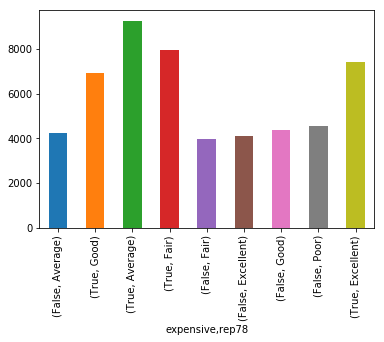

In [24]:
auto_df_grpby_aff_rep78['price'].mean().plot(kind='bar');